# Лабораторная работа №1. 
**"Аналитический и численный (Брауна-Робинсон) методы решения антагонистической игры в смешанных стратегиях**

**Выполнил: Александров А. Н., ИУ8-104**

**Вариант: 1**

## Задание
Найти цену игры и оптимальные стратегии обоих игроков методами обратной матрицы (аналитически) и Брауна-Робинсон. Сравнить полученные результаты.

Игра Г размера (3 x 3) задана матрицей:
 
| 1  | 11 | 11 |
|:--:|:--:|:--:|
| 7  | 5  | 8  | 
| 16 | 6  | 2  | 


In [501]:
import logging
from pathlib import Path
from copy import deepcopy

import numpy as np

from game_theory.utils.matrix_games.brown_robinson.brown_robinson import BrownRobinson
from game_theory.utils.matrix_games.brown_robinson.labels import (
    MAXMIN_ESTIMATION_LABEL,
    MINMAX_ESTIMATION_LABEL,
    ACCURACY_LABEL,
)
from game_theory.utils.matrix_games.analytical import AnalyticalSolver
from game_theory.utils.matrix_games.game_matrix import GameMatrix
from game_theory.utils.matrix_games.mixed_strategies import (
    check_resulted_game_price,
    get_resulted_mixed_strategies,
)

logging.basicConfig(level=logging.INFO, format='%(message)s')

In [502]:
# Входная матрица прямоугольной игры с нулевой суммой.
original_game_matrix = GameMatrix(
    matrix=np.array(
        [
            [1, 11, 11],
            [7, 5, 8],
            [16, 6, -2],
        ],
        dtype=int,
    )
)
original_game_matrix

+-----------------------------------------------+
|          Таблица стратегий (игрока А)         |
+----------------+----+----+----+---------------+
|   Стратегии    | b1 | b2 | b3 | MIN выигрыш A |
+----------------+----+----+----+---------------+
|       a1       | 1  | 11 | 11 |       1       |
|       a2       | 7  | 5  | 8  |       5       |
|       a3       | 16 | 6  | -2 |       -2      |
| MAX проигрыш B | 16 | 11 | 11 |               |
+----------------+----+----+----+---------------+

In [503]:
print(f"Нижняя цена игры:  {original_game_matrix.lowest_game_price[1]}\n"
      f"Верхняя цена игры: {original_game_matrix.highest_game_price[1]}")

Нижняя цена игры:  5
Верхняя цена игры: 11


In [504]:
game_matrix: GameMatrix = deepcopy(original_game_matrix)
normalizer: int = game_matrix.normalize_matrix()
game_matrix

Прибавили ко всем элементам исходной матрицы 2


+-----------------------------------------------+
|          Таблица стратегий (игрока А)         |
+----------------+----+----+----+---------------+
|   Стратегии    | b1 | b2 | b3 | MIN выигрыш A |
+----------------+----+----+----+---------------+
|       a1       | 3  | 13 | 13 |       3       |
|       a2       | 9  | 7  | 10 |       7       |
|       a3       | 18 | 8  | 0  |       0       |
| MAX проигрыш B | 18 | 13 | 13 |               |
+----------------+----+----+----+---------------+

In [505]:
print(f"Нижняя цена игры:  {game_matrix.lowest_game_price[1]}\n"
      f"Верхняя цена игры: {game_matrix.highest_game_price[1]}")

Нижняя цена игры:  7
Верхняя цена игры: 13


In [506]:
reduced_game: GameMatrix = game_matrix.reduce_dimension(method='dominant_absorption')
reduced_game

+-----------------------------------------------+
|          Таблица стратегий (игрока А)         |
+----------------+----+----+----+---------------+
|   Стратегии    | b1 | b2 | b3 | MIN выигрыш A |
+----------------+----+----+----+---------------+
|       a1       | 3  | 13 | 13 |       3       |
|       a2       | 9  | 7  | 10 |       7       |
|       a3       | 18 | 8  | 0  |       0       |
| MAX проигрыш B | 18 | 13 | 13 |               |
+----------------+----+----+----+---------------+

In [507]:
print(f"Нижняя цена игры:  {reduced_game.lowest_game_price[1]}\n"
      f"Верхняя цена игры: {reduced_game.highest_game_price[1]}")

Нижняя цена игры:  7
Верхняя цена игры: 13


### 1. Аналитический (матричный) метод

#### 1.1. Обратная матрица для игрока A

Для игрока $A$ ($h$ - цена игры; $y_1, ..., y_m$ - смешанные стратегии игрока $A$):

![analytical_A](./img/analytical_A.png)

In [508]:
analytical_solver = AnalyticalSolver(reduced_game)
(
    first_mixed_strategy,
    second_mixed_strategy,
    third_mixed_strategy,
    game_price_value,
) = analytical_solver.player_a_solve()

In [509]:
# Смешанные стратегии игрока A и цена игры.
assert check_resulted_game_price(
    game_matrix=reduced_game,
    game_price_value=game_price_value,
)

mixed_strategies = get_resulted_mixed_strategies(
    player_labels=game_matrix.player_a_strategy_labels,
    labels_to_probability=dict(zip(
        reduced_game.player_a_strategy_labels,
        (first_mixed_strategy, second_mixed_strategy, third_mixed_strategy),
    )),
    player_name="A",
)
print(mixed_strategies)

Цена игры: 7 <= 8.962 <= 13


+------------------------------+
| Смешанные стратегии игрока A |
+---------+---------+----------+
|    a1   |    a2   |    a3    |
+---------+---------+----------+
|  0.295  |  0.513  |  0.192   |
+---------+---------+----------+


In [510]:
sum((first_mixed_strategy, second_mixed_strategy, third_mixed_strategy,))

1.0

#### 2.2.1. Прямая матрица для игрока B
Для игрока $B$ ($g$ - цена игры; $x_1, ..., y_n$ - смешанные стратегии игрока $B$):

![analytical_B](./img/analytical_B.png)

In [511]:
analytical_solver = AnalyticalSolver(reduced_game)
(
    first_mixed_strategy,
    second_mixed_strategy,
    third_mixed_strategy,
    game_price_value,
) = analytical_solver.player_b_solve()

In [512]:
# Смешанные стратегии игрока B и цена игры.
assert check_resulted_game_price(
    game_matrix=reduced_game,
    game_price_value=game_price_value,
)

mixed_strategies = get_resulted_mixed_strategies(
    player_labels=game_matrix.player_b_strategy_labels,
    labels_to_probability=dict(zip(
        reduced_game.player_b_strategy_labels,
        (first_mixed_strategy, second_mixed_strategy, third_mixed_strategy),
    )),
    player_name="B",
)
print(mixed_strategies)

Цена игры: 7 <= 8.962 <= 13


+------------------------------+
| Смешанные стратегии игрока B |
+---------+---------+----------+
|    b1   |    b2   |    b3    |
+---------+---------+----------+
|  0.404  |  0.212  |  0.385   |
+---------+---------+----------+


In [513]:
sum((first_mixed_strategy, second_mixed_strategy, third_mixed_strategy,))

1.0

### Возврат к цене игры для исходной матрицы

In [514]:
assert check_resulted_game_price(
    game_matrix=original_game_matrix,
    # Уменьшаем ЦИ на слагаемое, используемое при нормализации матрицы.
    game_price_value=game_price_value - normalizer,
)

Цена игры: 5 <= 6.962 <= 11


### 2. Численный метод Брауна-Робинсон

Уровень погрешности: $\varepsilon \le 0,1$

In [515]:
reduced_game

+-----------------------------------------------+
|          Таблица стратегий (игрока А)         |
+----------------+----+----+----+---------------+
|   Стратегии    | b1 | b2 | b3 | MIN выигрыш A |
+----------------+----+----+----+---------------+
|       a1       | 3  | 13 | 13 |       3       |
|       a2       | 9  | 7  | 10 |       7       |
|       a3       | 18 | 8  | 0  |       0       |
| MAX проигрыш B | 18 | 13 | 13 |               |
+----------------+----+----+----+---------------+

In [516]:
brown_robinson = BrownRobinson(game_matrix=reduced_game, accuracy=0.1)
df = brown_robinson.solve(out=Path("iterations_table.csv"))
df

,k,A,B,a1,a2,a3,b1,b2,b3,ВЦИ,НЦИ,ε
0,1,a3,b1,3,9,18,18,8,0,18.000,0.000,18.000
1,2,a3,b3,16,19,18,36,16,0,9.500,0.000,9.500
2,3,a2,b3,29,29,18,45,23,10,9.667,3.333,6.167
3,4,a1,b3,42,39,18,48,36,23,10.500,5.750,3.750
4,5,a1,b3,55,49,18,51,49,36,11.000,7.200,2.300
...,...,...,...,...,...,...,...,...,...,...,...,...
97,98,a1,b1,904,880,834,825,893,926,9.224,8.418,0.331
98,99,a1,b1,907,889,852,828,906,939,9.162,8.364,0.273
99,100,a1,b1,910,898,870,831,919,952,9.100,8.310,0.211
100,101,a1,b1,913,907,888,834,932,965,9.040,8.257,0.151


In [517]:
# Приближенная цена игры игроков.
game_price_value = brown_robinson.game_price_estimation
# Приближенные смешанные стратегии игроков.
(
    (strategy_a_1, strategy_a_2, strategy_a_3),
    (strategy_b_1, strategy_b_2, strategy_b_3),
) = brown_robinson.mixed_strategies

In [518]:
# Смешанные стратегии игрока A и цена игры.
assert check_resulted_game_price(
    game_matrix=reduced_game,
    game_price_value=game_price_value,
)

Цена игры: 7 <= 8.980 <= 13


In [519]:
mixed_strategies = get_resulted_mixed_strategies(
    player_labels=game_matrix.player_a_strategy_labels,
    labels_to_probability=dict(zip(
        reduced_game.player_a_strategy_labels,
        (strategy_a_1, strategy_a_2, strategy_a_3),
    )),
    player_name="A",
)
print(mixed_strategies)

+------------------------------+
| Смешанные стратегии игрока A |
+---------+---------+----------+
|    a1   |    a2   |    a3    |
+---------+---------+----------+
|  0.353  |  0.500  |  0.147   |
+---------+---------+----------+


In [520]:
sum((strategy_a_1, strategy_a_2, strategy_a_3))

1.0

In [521]:
mixed_strategies = get_resulted_mixed_strategies(
    player_labels=game_matrix.player_b_strategy_labels,
    labels_to_probability=dict(zip(
        reduced_game.player_b_strategy_labels,
        (strategy_b_1, strategy_b_2, strategy_b_3),
    )),
    player_name="B",
)
print(mixed_strategies)

+------------------------------+
| Смешанные стратегии игрока B |
+---------+---------+----------+
|    b1   |    b2   |    b3    |
+---------+---------+----------+
|  0.402  |  0.206  |  0.392   |
+---------+---------+----------+


In [522]:
sum((strategy_b_1, strategy_b_2, strategy_b_3))

1.0

<Axes: title={'center': 'График сходимости верхней и нижней цен игры в алгоритме Брауна-Робинсон'}, xlabel='Итерации алгоритма', ylabel='Значения цен игры'>

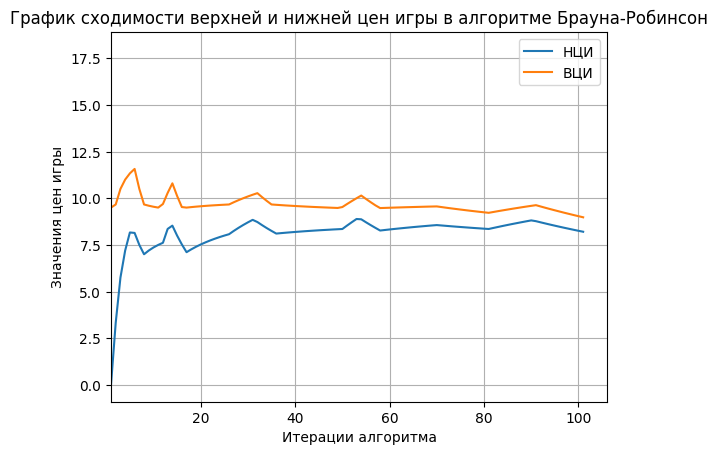

In [523]:
df[[MAXMIN_ESTIMATION_LABEL, MINMAX_ESTIMATION_LABEL]].plot(
    title="График сходимости верхней и нижней цен игры в алгоритме Брауна-Робинсон",
    xlabel="Итерации алгоритма",
    ylabel="Значения цен игры",
    xlim=(1, None),
    grid=True,
)

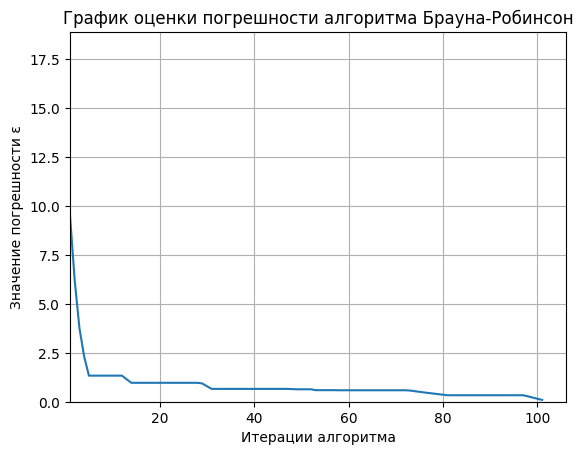

In [524]:
plt = df[ACCURACY_LABEL].plot(
    title="График оценки погрешности алгоритма Брауна-Робинсон",
    xlabel="Итерации алгоритма",
    ylabel="Значение погрешности ε",
    xlim=(1, None),
    ylim=(0, None),
    grid=True,
)

### Возврат к цене игры для исходной матрицы

In [525]:
assert check_resulted_game_price(
    game_matrix=original_game_matrix,
    # Уменьшаем ЦИ на слагаемое, используемое при нормализации матрицы.
    game_price_value=game_price_value - normalizer,
)

Цена игры: 5 <= 6.980 <= 11
